한국 프로야구 10개팀 클러스터링

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [8]:
baseball = tables[0]
baseball

,순위,팀명,승,무,패,승률,게임차,득점,실점,연속
0,1,SK,59,1,29,0.670,0.0,441,342,2패
1,2,두산,54,0,36,0.600,6.0,440,346,2승
2,3,Hero,54,0,37,0.593,6.5,500,387,4승
3,4,LG,49,1,38,0.563,9.5,377,377,1패
4,5,NC,42,1,44,0.488,16.0,409,415,2패
5,6,KT,42,1,47,0.472,17.5,407,456,1패
6,7,삼성,37,1,49,0.430,21.0,400,424,2승
7,8,KIA,36,1,52,0.409,23.0,401,467,2패
8,9,한화,34,0,53,0.391,24.5,388,449,1승
9,10,롯데,32,2,54,0.372,26.0,407,507,1승


In [9]:
#baseball.set_index('팀명', inplace=True)
base = baseball.set_index('팀명')

In [10]:
base

,순위,승,무,패,승률,게임차,득점,실점,연속
팀명,,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342,2패
두산,2,54,0,36,0.600,6.0,440,346,2승
Hero,3,54,0,37,0.593,6.5,500,387,4승
LG,4,49,1,38,0.563,9.5,377,377,1패
NC,5,42,1,44,0.488,16.0,409,415,2패
KT,6,42,1,47,0.472,17.5,407,456,1패
삼성,7,37,1,49,0.430,21.0,400,424,2승
KIA,8,36,1,52,0.409,23.0,401,467,2패
한화,9,34,0,53,0.391,24.5,388,449,1승


In [12]:
base.dtypes

순위       int64
승        int64
무        int64
패        int64
승률     float64
게임차    float64
득점       int64
실점       int64
연속      object
dtype: object

In [13]:
data = base.drop(columns='연속')
data

,순위,승,무,패,승률,게임차,득점,실점
팀명,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342
두산,2,54,0,36,0.600,6.0,440,346
Hero,3,54,0,37,0.593,6.5,500,387
LG,4,49,1,38,0.563,9.5,377,377
NC,5,42,1,44,0.488,16.0,409,415
KT,6,42,1,47,0.472,17.5,407,456
삼성,7,37,1,49,0.430,21.0,400,424
KIA,8,36,1,52,0.409,23.0,401,467
한화,9,34,0,53,0.391,24.5,388,449


In [16]:
# 2차원으로 변환한 후 k개로 클러스터링
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [20]:
from sklearn.cluster import KMeans

In [22]:
# k-means로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

In [24]:
import mglearn

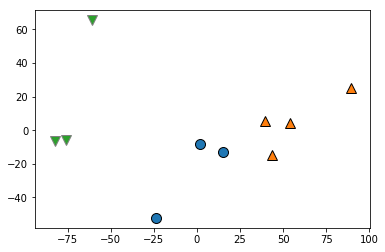

In [26]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)

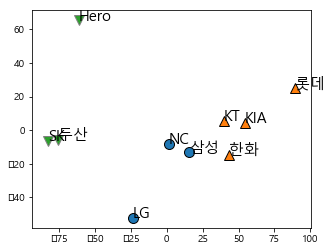

In [28]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,4))
plt.xlim(data_pca[:,0].min(), data_pca[:,0].max()+1)
plt.xlim(data_pca[:,1].min(), data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i], fontdict={'size':15})
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)